In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
from models import VCN32, VCN16, VCN8

# Transfer Learning
We will run experiments on VCN32, VCN16, and VCN8 to show the effect of transfer learning on training loss convergence. Transfer learning is taking a pretrained model and using it on a similar but different problem. In our case, the encoder backbone of the Fully Convolutional Networks (VCN) uses the convolutional layers of the VGG 11 architecture. 

Transfer learning helps speed up the training time of a model because it has already learned relevant features that may be applied to the current problem we're solving. If you know how to draw a cat, chances are you won't have difficulty learning how to draw a dog (hence the learnings from drawing a cat is "transferable"). To see the effects of transfer learning on training speed, we will train each FCN for 50 epochs on 3 configurations: 

1. <b>Encoder backbone without pretrained VGG 11</b>
2. <b>Encoder backbone = pretrained VGG 11</b>
3. <b>Encoder backbone = pretrained VGG 11 with weights frozen</b>

We will produce training loss curves and compare the results.

## VCN Models

In [120]:
vcn32s = [("not pretrained", VCN32(pretrained=False)), 
          ("pretrained", VCN32(pretrained=True)), 
          ("pretrained [frozen]", VCN32(pretrained=True, freeze_pretrained=True))]

vcn16s = [("not pretrained", VCN16(pretrained=False)), 
          ("pretrained", VCN16(pretrained=True)), 
          ("pretrained [frozen]", VCN16(pretrained=True, freeze_pretrained=True))]

vcn8s = [("not pretrained", VCN8(pretrained=False)), 
          ("pretrained", VCN8(pretrained=True)), 
          ("pretrained [frozen]", VCN8(pretrained=True, freeze_pretrained=True))]

# Dataset
We're going to overfit one data point

In [158]:
from dataset import SegmentationDataset
from torchvision.transforms import ToTensor, Normalize, Compose, Resize

transforms = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    Resize((224, 224))
])

target_transforms = Compose([
    Resize((224, 224))
])

dataset = SegmentationDataset(root="data/stage1_train", transform=transforms, target_transform=target_transforms)

In [159]:
print(dataset[3][0].shape)
print(dataset[9][])

(dataset[9][0]).sum() / (3 * 224 * 224)

torch.Size([3, 224, 224])


tensor(0.7506)

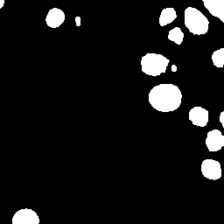

In [113]:
dataset[0][1]